In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from matplotlib import animation
from numpy import dtype
import geopandas as gpd
from shapely.geometry import Point

from folium.plugins import HeatMap

%matplotlib inline
# activate plot theme




In [ ]:


from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/911.csv'

df = pd.read_csv(data_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv("911.csv")

FileNotFoundError: ignored

## Data Preprocessing

In [ ]:
#checking the shape of the data

df.shape

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## EDA and Missing Values

In [ ]:
totalRows=len(df.index)
print("There are ", totalRows, " so totalRows-count is equal to missing variables.")
print(df.describe())
print(df.columns)


There are  99492  so totalRows-count is equal to missing variables.
                lat           lng           zip        e
count  99492.000000  99492.000000  86637.000000  99492.0
mean      40.159526    -75.317464  19237.658298      1.0
std        0.094446      0.174826    345.344914      0.0
min       30.333596    -95.595595  17752.000000      1.0
25%       40.100423    -75.392104  19038.000000      1.0
50%       40.145223    -75.304667  19401.000000      1.0
75%       40.229008    -75.212513  19446.000000      1.0
max       41.167156    -74.995041  77316.000000      1.0
Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [ ]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

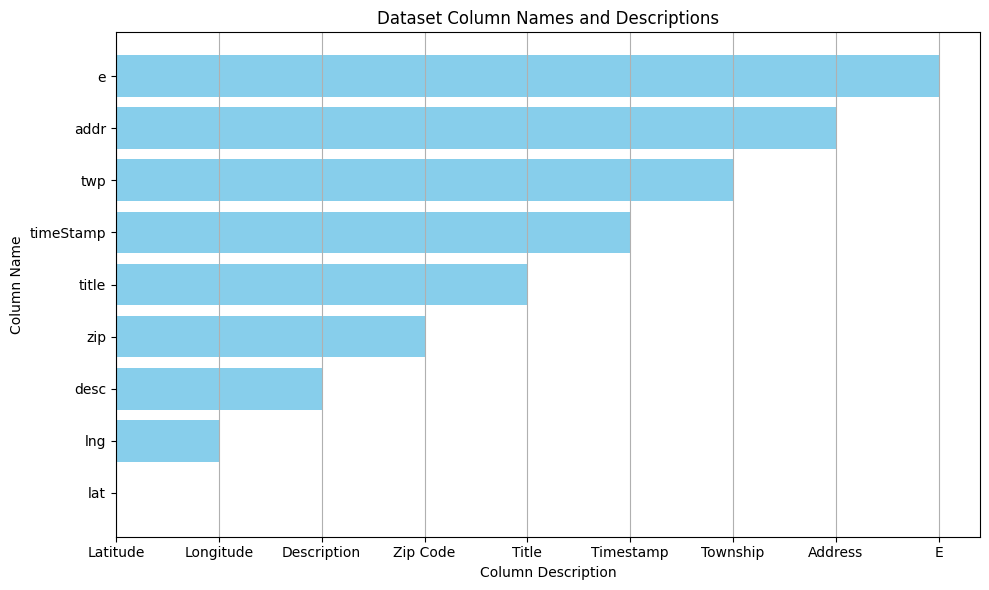

In [ ]:
column_data = {
    'Column Name': df.columns,
    'Description': ['Latitude','Longitude','Description','Zip Code','Title','Timestamp','Township','Address','E']
}

df_columns = pd.DataFrame(column_data)

plt.figure(figsize=(10, 6))
plt.barh(df_columns['Column Name'], df_columns['Description'], color='skyblue')
plt.xlabel('Column Description')
plt.ylabel('Column Name')
plt.title('Dataset Column Names and Descriptions')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

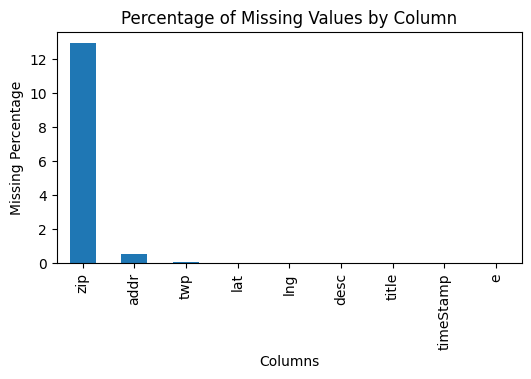

In [ ]:
# Priyanka

# Analysis by visualizing missing values

missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(6, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values by Column')
plt.show()

In [ ]:
df.dropna(inplace=True)
df.drop('desc', axis=1, inplace=True)
print(len(df.index))
print(df.isnull().sum())


86576
lat          0
lng          0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64


## Feature Engineering : Creating two new Columns - incident_type based on title and coordinates (combining lat and lan)

In [ ]:
df["Coordinates"] = list(zip(df.lat, df.lng))
df["Coordinates"] = df["Coordinates"].apply(Point)


In [ ]:
df['incident_type'] = df['title'].apply(lambda x: x.split(':')[0].strip())

In [ ]:
#updated DataFrame
print(df[['title', 'incident_type','Coordinates']].head())
# print(df.incident_type.unique())

                     title incident_type                     Coordinates
0   EMS: BACK PAINS/INJURY           EMS  POINT (40.2978759 -75.5812935)
1  EMS: DIABETIC EMERGENCY           EMS  POINT (40.2580614 -75.2646799)
2      Fire: GAS-ODOR/LEAK          Fire  POINT (40.1211818 -75.3519752)
3   EMS: CARDIAC EMERGENCY           EMS    POINT (40.116153 -75.343513)
5         EMS: HEAD INJURY           EMS   POINT (40.2534732 -75.283245)


In [ ]:
# Priyanka - Remove keywords of incident_type along with colon from the 'title' column

df['title'] = df['title'].str.replace(r'^[A-Za-z]+:\s*', '', regex=True)


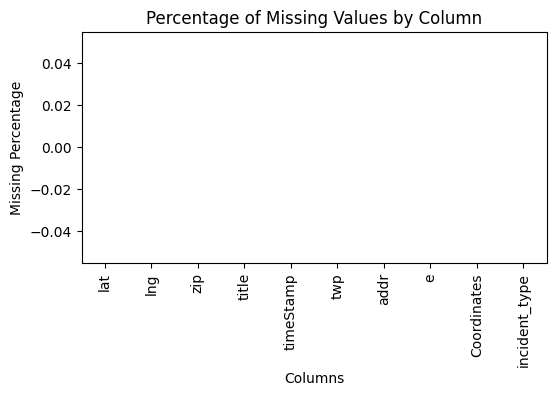

In [ ]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(6, 3))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Percentage of Missing Values by Column')
plt.show()

## Distribution of the incident_type and installing 'seaborn' library for visualaisations

In [ ]:
!pip install seaborn


In [ ]:
incident_counts = df.groupby('incident_type').size().reset_index(name='call_count')
print(incident_counts)

  incident_type  call_count
0           EMS       44318
1          Fire       13004
2       Traffic       29254


## Palette - viridis

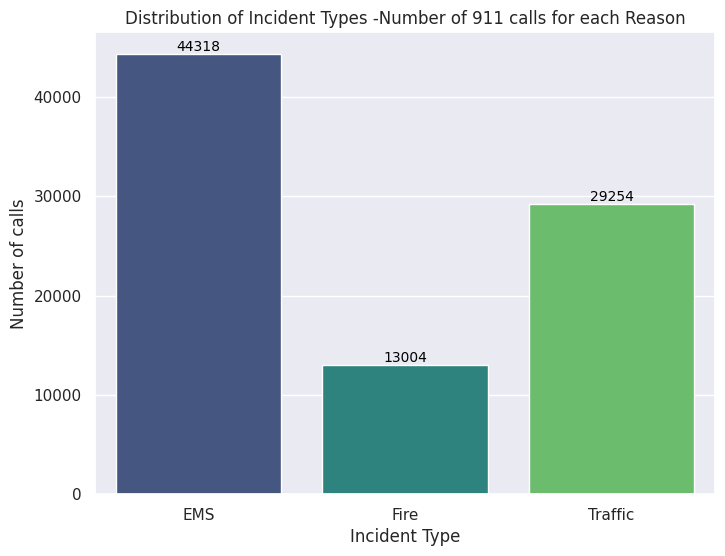

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the 'incident_type' column
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='incident_type', data=df, palette='viridis')

# Add annotations with the exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=10,
                color='black')

plt.title('Distribution of Incident Types -Number of 911 calls for each Reason')
plt.xlabel('Incident Type')
plt.ylabel('Number of calls')

plt.show()



In [ ]:
# Priyanka - Create a wordcloud for common complaints for all these individual incident types

from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

unique_incident_types = ['EMS', 'Fire', 'Traffic']
filtered_df = df[df['incident_type'].isin(unique_incident_types)]

# Group titles by incident_type and concatenate them into a single text for each incident type
grouped_titles = filtered_df.groupby('incident_type')['title'].apply(' '.join).reset_index()

EMS_DF = grouped_titles[grouped_titles['incident_type'].isin(["EMS"])]
Fire_DF = grouped_titles[grouped_titles['incident_type'].isin(["Fire"])]
Traffic_DF = grouped_titles[grouped_titles['incident_type'].isin(["Traffic"])]

stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
incident_counts = df.groupby('incident_type').size().reset_index(name='call_count')
print(incident_counts)

  incident_type  call_count
0           EMS       44318
1          Fire       13004
2       Traffic       29254


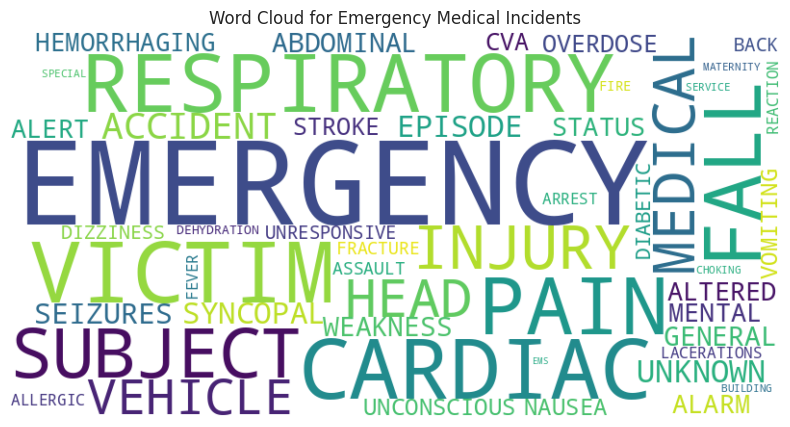

In [ ]:
common_words = ''
for i in EMS_DF.title:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, max_words=50, stopwords=stopwords,).generate(common_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Emergency Medical Incidents')
plt.show()

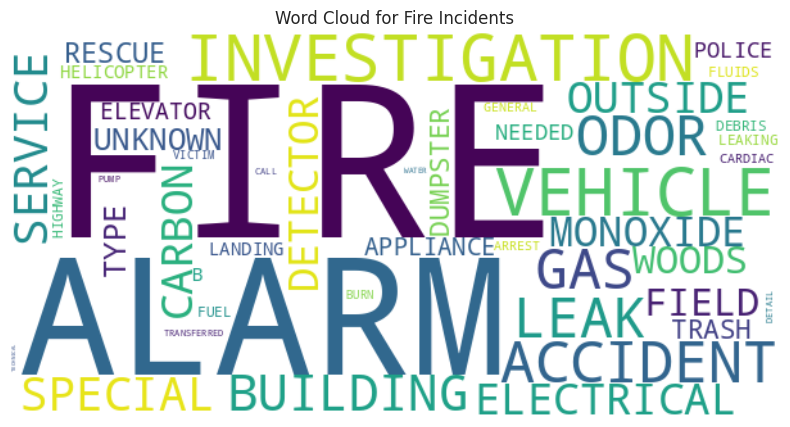

In [ ]:
common_words = ''
for i in Fire_DF.title:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=600, height=300, background_color='white', collocations=False, max_words=50, stopwords=stopwords,).generate(common_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Fire Incidents')
plt.show()


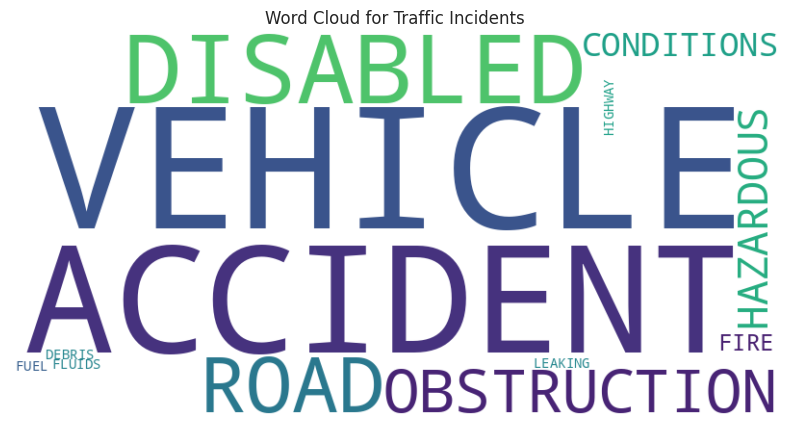

In [ ]:
common_words = ''
for i in Traffic_DF.title:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens) + " "

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, max_words=50, stopwords=stopwords,).generate(common_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Traffic Incidents')
plt.show()

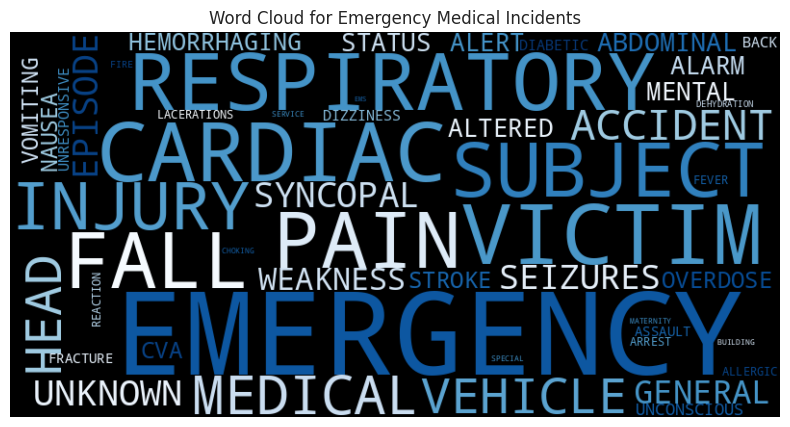

In [ ]:
common_words = ''
for i in EMS_DF.title:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens) + " "

wordcloud = WordCloud(background_color="black", colormap="Blues", max_words=50, stopwords=stopwords, collocations=False, width=800, height=400).generate(common_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Emergency Medical Incidents')
plt.show()

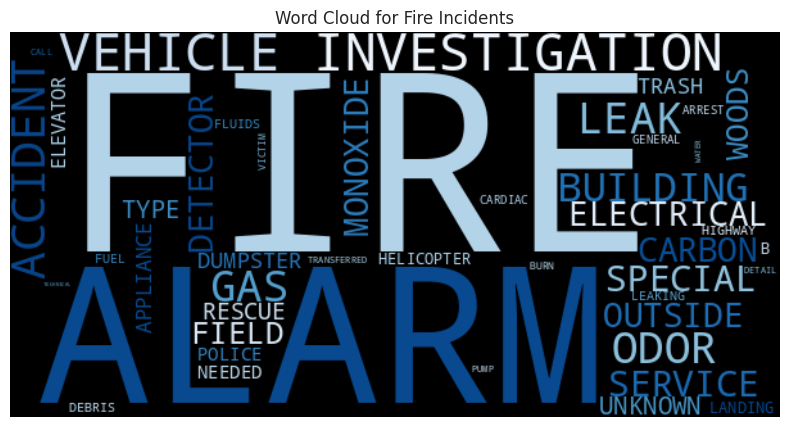

In [ ]:
common_words = ''
for i in Fire_DF.title:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens) + " "

wordcloud = WordCloud(background_color="black", colormap="Blues", max_words=50, stopwords=stopwords, collocations=False, width=600, height=300).generate(common_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Fire Incidents')
plt.show()

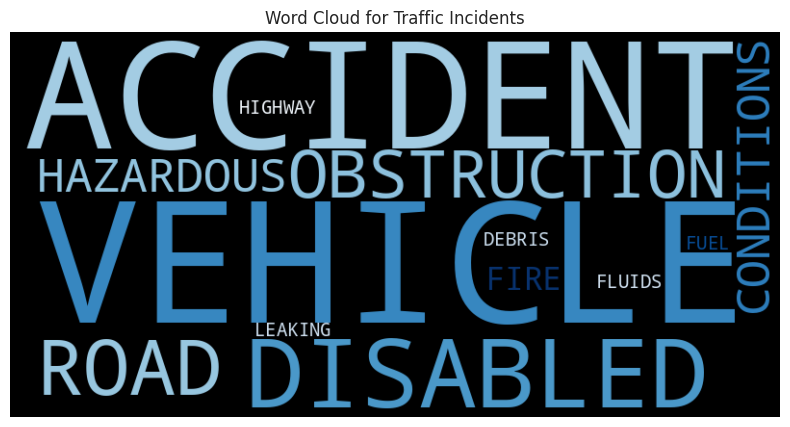

In [ ]:
common_words = ''
for i in Traffic_DF.title:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens) + " "

wordcloud = WordCloud(background_color="black", colormap="Blues", max_words=50, stopwords=stopwords, collocations=False, width=800, height=400).generate(common_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for Traffic Incidents')
plt.show()


## top 5 zip codes for 911 calls

In [ ]:
top_zipcodes = df['zip'].value_counts().head(5)
print(top_zipcodes)


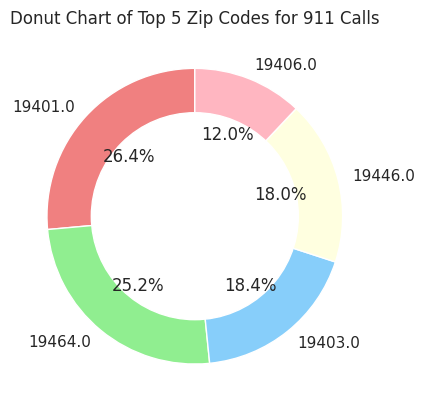

In [ ]:
fig, ax = plt.subplots()
ax.pie(top_zipcodes, labels=top_zipcodes.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightskyblue', 'lightyellow', 'lightpink'])
ax.add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Donut Chart of Top 5 Zip Codes for 911 Calls')
plt.show()


In [ ]:
top_townships = df.twp.value_counts().head(5)
print(top_townships)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


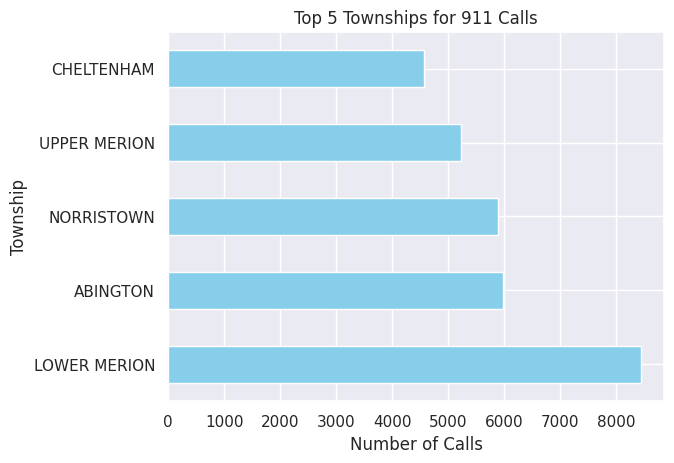

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
top_townships = df['twp'].value_counts().head(5)

# Plotting a horizontal bar chart
top_townships.plot(kind='barh', color='skyblue')
plt.title('Top 5 Townships for 911 Calls')
plt.xlabel('Number of Calls')
plt.ylabel('Township')
plt.show()


## NEW COLUMN - 'incident' - created for word cloud

In [ ]:
# Assuming df is your DataFrame
df['incident'] = df['title'].str.extract(r':\s*(.*)', expand=False)

# Display the DataFrame with the new 'incident_type' column
print(df[['title', 'incident']].head())


                     title            incident
0   EMS: BACK PAINS/INJURY   BACK PAINS/INJURY
1  EMS: DIABETIC EMERGENCY  DIABETIC EMERGENCY
2      Fire: GAS-ODOR/LEAK       GAS-ODOR/LEAK
3   EMS: CARDIAC EMERGENCY   CARDIAC EMERGENCY
5         EMS: HEAD INJURY         HEAD INJURY


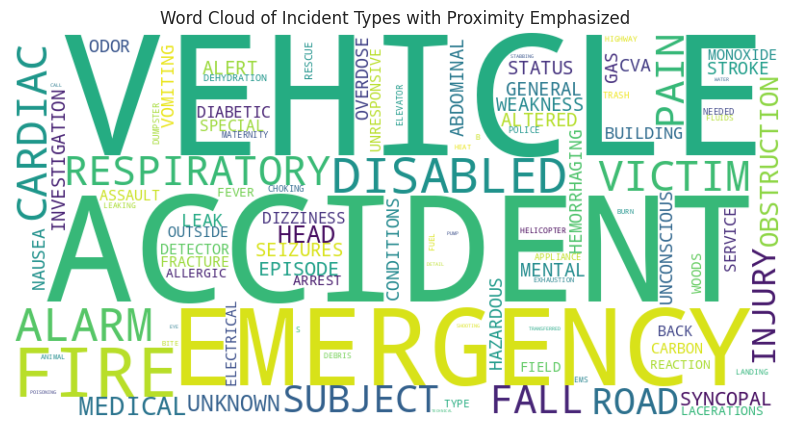

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
incident_text = ' '.join(df['incident'].dropna())

# Generate a Word Cloud with grouped words
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(incident_text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Incident Types with Proximity Emphasized')
plt.show()


## The above word cloud also represents the Gestalt principles of Proximity highlight the most popular reasons in the same colur palatee

## Utilizing time stamp column - converting the time stamp column from str to object for further visulaizations

In [ ]:
type(df['timeStamp'].iloc[0])


str

In [ ]:
# Use [pd.to_datetime] to convert the column from strings to DateTime objects.
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.dtypes

lat                     float64
lng                     float64
zip                     float64
title                    object
timeStamp        datetime64[ns]
twp                      object
addr                     object
e                         int64
Coordinates              object
incident_type            object
incident                 object
dtype: object

## 3 new columns called Hour, Month, and Day of Week

In [ ]:
#use .apply() to create 3 new columns called Hour, Month, and Day of Week.

df['Hour']= df['timeStamp'].apply(lambda x: x.hour)
df['Month']= df['timeStamp'].apply(lambda x:x.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,zip,title,timeStamp,twp,addr,e,Coordinates,incident_type,incident,Hour,Month,Day Of Week
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,POINT (40.2978759 -75.5812935),EMS,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,POINT (40.2580614 -75.2646799),EMS,DIABETIC EMERGENCY,17,12,3
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,POINT (40.1211818 -75.3519752),Fire,GAS-ODOR/LEAK,17,12,3
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,POINT (40.116153 -75.343513),EMS,CARDIAC EMERGENCY,17,12,3
5,40.253473,-75.283245,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,POINT (40.2534732 -75.283245),EMS,HEAD INJURY,17,12,3


In [ ]:
# Use the .map() with this dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day Of Week']= df['Day Of Week'].map(dmap)
df.head()

,lat,lng,zip,title,timeStamp,twp,addr,e,Coordinates,incident_type,incident,Hour,Month,Day Of Week
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,POINT (40.2978759 -75.5812935),EMS,BACK PAINS/INJURY,17,12,Thu
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,POINT (40.2580614 -75.2646799),EMS,DIABETIC EMERGENCY,17,12,Thu
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,POINT (40.1211818 -75.3519752),Fire,GAS-ODOR/LEAK,17,12,Thu
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,POINT (40.116153 -75.343513),EMS,CARDIAC EMERGENCY,17,12,Thu
5,40.253473,-75.283245,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,POINT (40.2534732 -75.283245),EMS,HEAD INJURY,17,12,Thu


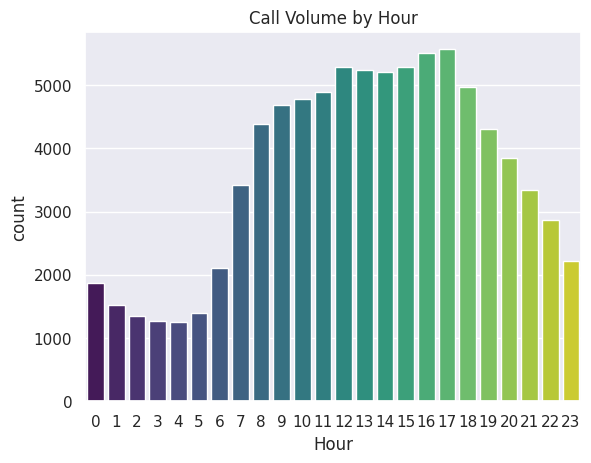

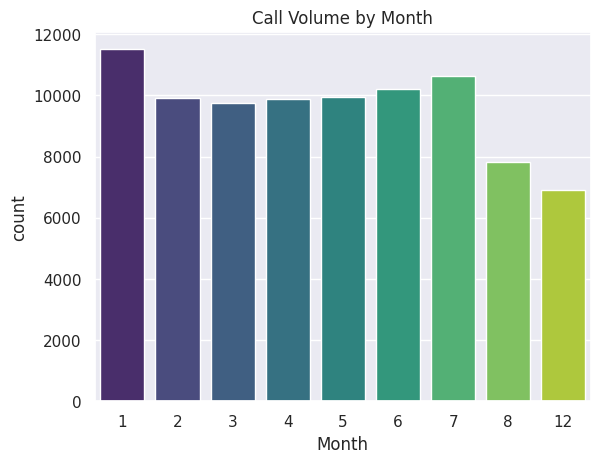

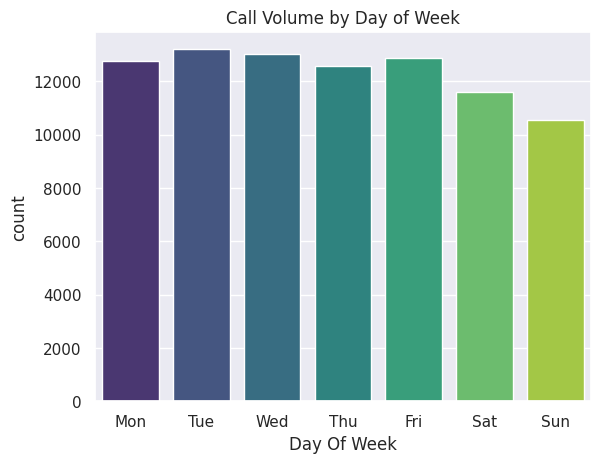

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Call Volume by Hour
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Call Volume by Hour')
plt.show()

# Call Volume by Month
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Call Volume by Month')
plt.show()

# Call Volume by Day of Week
sns.countplot(x='Day Of Week', data=df, palette='viridis', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Call Volume by Day of Week')
plt.show()


## Category-wise Analysis:

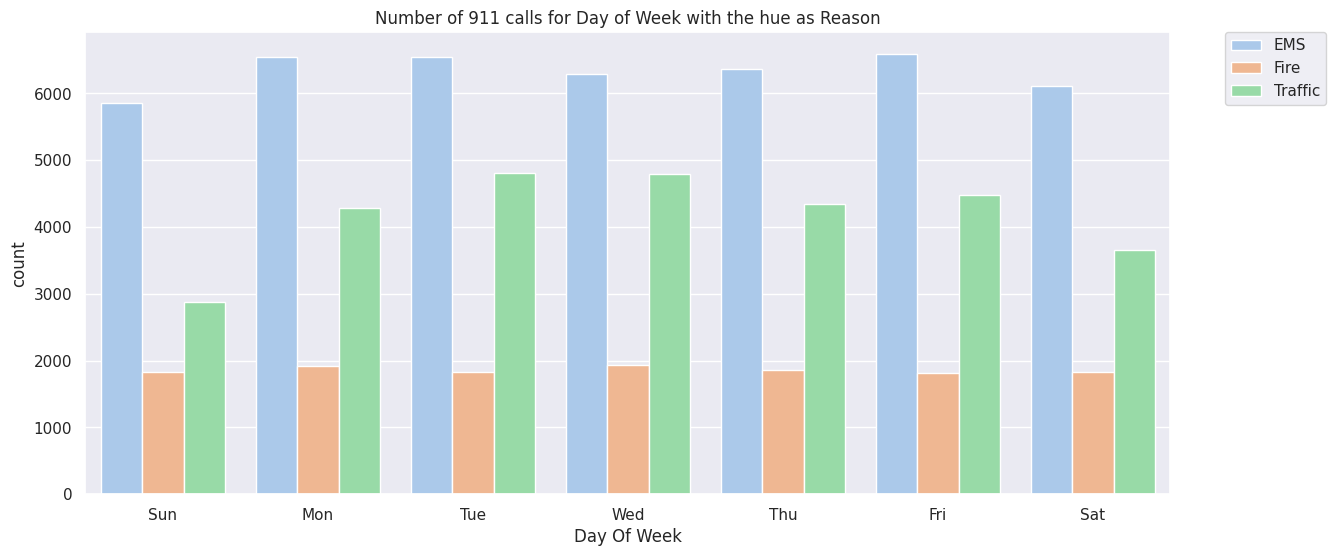

In [ ]:
# use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
days_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.figure(figsize=(14,6))
sns.countplot(x='Day Of Week',data = df, hue='incident_type',palette='pastel', order=days_order)
plt.title('Number of 911 calls for Day of Week with the hue as Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # To relocate the legend
plt.show()

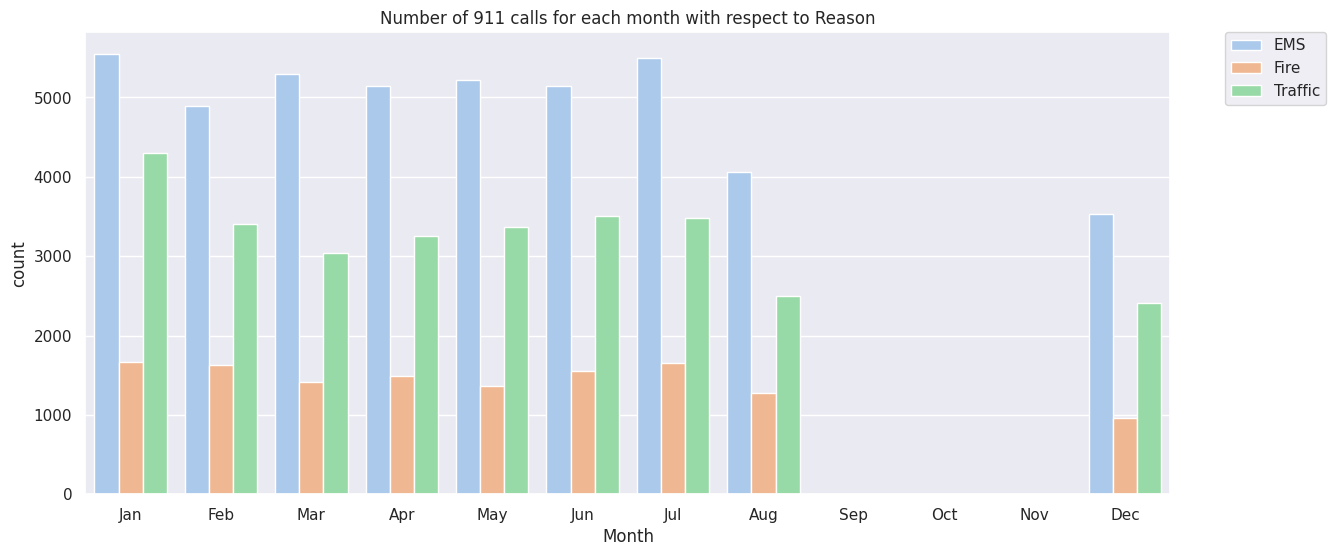

In [ ]:
# same for Month
import calendar

# Assuming your 'Month' column contains numeric representations of months (1 for Jan, 2 for Feb, etc.)
# Replace 'Month' with the actual column name in your DataFrame
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Define the order of months in chronological order
month_order = [calendar.month_abbr[i] for i in range(1, 13)]

plt.figure(figsize=(14, 6))
sns.countplot(x='Month', data=df, hue='incident_type', palette='pastel', order=month_order)
plt.title('Number of 911 calls for each month with respect to Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Interactive Visulaisation through **MAPS**

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Filter data for North American region (adjust bounding box coordinates as needed)
north_america_bbox = (-180, 0, -30, 90)
filtered_df = df[(df['lng'] >= north_america_bbox[0]) & (df['lng'] <= north_america_bbox[2]) &
                 (df['lat'] >= north_america_bbox[1]) & (df['lat'] <= north_america_bbox[3])]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.lng, filtered_df.lat))

# Create a base map focused on North America
mymap = folium.Map(location=[gdf['lat'].mean(), gdf['lng'].mean()], zoom_start=4)

# Add HeatMap layer
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]
HeatMap(heat_data).add_to(mymap)

# Save the map to an HTML file
mymap.save("/content/drive/MyDrive/911_north_america_heatmap.html")


In [ ]:
from folium.plugins import MarkerCluster

mymap = folium.Map(location=[gdf['lat'].mean(), gdf['lng'].mean()], zoom_start=4)
marker_cluster = MarkerCluster().add_to(mymap)

for index, row in gdf.iterrows():
    folium.Marker([row['lat'], row['lng']], popup=row['title']).add_to(marker_cluster)

mymap.save("/content/drive/MyDrive/911_north_america_marker_cluster.html")


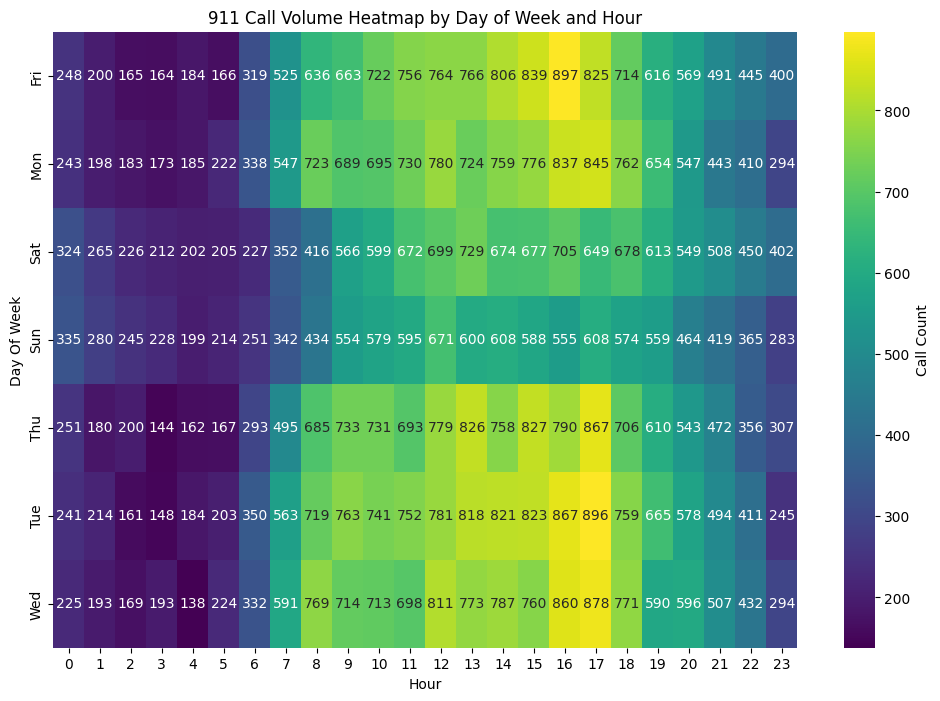

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
heatmap_data = df.groupby(['Day Of Week', 'Hour']).size().unstack()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Call Count'})
plt.title('911 Call Volume Heatmap by Day of Week and Hour')
plt.show()


In [ ]:
df.head()

,lat,lng,zip,title,timeStamp,twp,addr,e,Coordinates,incident_type,incident,Hour,Month,Day Of Week
0,40.297876,-75.581294,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,POINT (40.2978759 -75.5812935),EMS,BACK PAINS/INJURY,17,12,Thu
1,40.258061,-75.264680,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,POINT (40.2580614 -75.2646799),EMS,DIABETIC EMERGENCY,17,12,Thu
2,40.121182,-75.351975,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,POINT (40.1211818 -75.3519752),Fire,GAS-ODOR/LEAK,17,12,Thu
3,40.116153,-75.343513,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,POINT (40.116153 -75.343513),EMS,CARDIAC EMERGENCY,17,12,Thu
5,40.253473,-75.283245,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,POINT (40.2534732 -75.283245),EMS,HEAD INJURY,17,12,Thu
